In [5]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [6]:
df = pd.read_csv('uber.csv')

In [7]:
df.head()
df.info()
df.columns
df = df.drop(['Unnamed: 0', 'key'], axis=1)
df.head()
df.shape
df.dtypes
df.info()
df.describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35725 entries, 0 to 35724
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         35725 non-null  int64  
 1   key                35725 non-null  object 
 2   fare_amount        35725 non-null  float64
 3   pickup_datetime    35725 non-null  object 
 4   pickup_longitude   35724 non-null  float64
 5   pickup_latitude    35724 non-null  float64
 6   dropoff_longitude  35724 non-null  float64
 7   dropoff_latitude   35724 non-null  float64
 8   passenger_count    35724 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 2.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35725 entries, 0 to 35724
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        35725 non-null  float64
 1   pickup_datetime    35725 non-null  object 
 2

<bound method NDFrame.describe of        fare_amount          pickup_datetime  pickup_longitude  \
0             7.50  2015-05-07 19:52:06 UTC        -73.999817   
1             7.70  2009-07-17 20:04:56 UTC        -73.994355   
2            12.90  2009-08-24 21:45:00 UTC        -74.005043   
3             5.30  2009-06-26 08:22:21 UTC        -73.976124   
4            16.00  2014-08-28 17:47:00 UTC        -73.925023   
...            ...                      ...               ...   
35720         4.10  2009-03-17 16:40:34 UTC        -73.989167   
35721         6.00  2014-06-12 20:03:00 UTC        -73.976287   
35722        20.83  2013-04-09 10:21:38 UTC        -73.988428   
35723        16.50  2011-04-03 12:44:31 UTC        -74.001600   
35724        12.50       2011-02-21 16:08:2               NaN   

       pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  
0            40.738354         -73.999512         40.723217              1.0  
1            40.728225         -73.994710         40.750325              1.0  
2            40.740770         -73.962565         40.772647              1.0  
3            40.790844         -73.965316         40.803349              3.0  
4            40.744085         -73.973082         40.761247              5.0  
...                ...                ...               ...              ...  
35720        40.762935         -73.991962         40.754702              3.0  
35721        40.760280         -73.983277         40.763827              5.0  
35722        40.670634         -74.013862         40.714818              1.0  
35723        40.727635         -73.983275         40.781579              1.0  
35724              NaN                NaN               NaN              NaN  

[35725 rows x 7 columns]>

In [8]:
df.isnull().sum()
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(), inplace=True)
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].median(), inplace=True)
df.isnull().sum()

<ipython-input-8-00000fcd1020>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(), inplace=True)
<ipython-input-8-00000fcd1020>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

,0
fare_amount,0
pickup_datetime,0
pickup_longitude,1
pickup_latitude,1
dropoff_longitude,0
dropoff_latitude,0
passenger_count,1


In [9]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35725 entries, 0 to 35724
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   fare_amount        35725 non-null  float64            
 1   pickup_datetime    35724 non-null  datetime64[ns, UTC]
 2   pickup_longitude   35724 non-null  float64            
 3   pickup_latitude    35724 non-null  float64            
 4   dropoff_longitude  35725 non-null  float64            
 5   dropoff_latitude   35725 non-null  float64            
 6   passenger_count    35724 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6)
memory usage: 1.9 MB


In [10]:
df = df.assign(hour = df.pickup_datetime.dt.hour,
              day= df.pickup_datetime.dt.day,
              month = df.pickup_datetime.dt.month,
              year = df.pickup_datetime.dt.dayofweek)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1.0,19.0,7.0,5.0,3.0
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1.0,20.0,17.0,7.0,4.0
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1.0,21.0,24.0,8.0,0.0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3.0,8.0,26.0,6.0,4.0
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5.0,17.0,28.0,8.0,3.0


In [11]:
df = df.drop('pickup_datetime', axis=1)
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,19.0,7.0,5.0,3.0
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,20.0,17.0,7.0,4.0
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,21.0,24.0,8.0,0.0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,8.0,26.0,6.0,4.0
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5.0,17.0,28.0,8.0,3.0


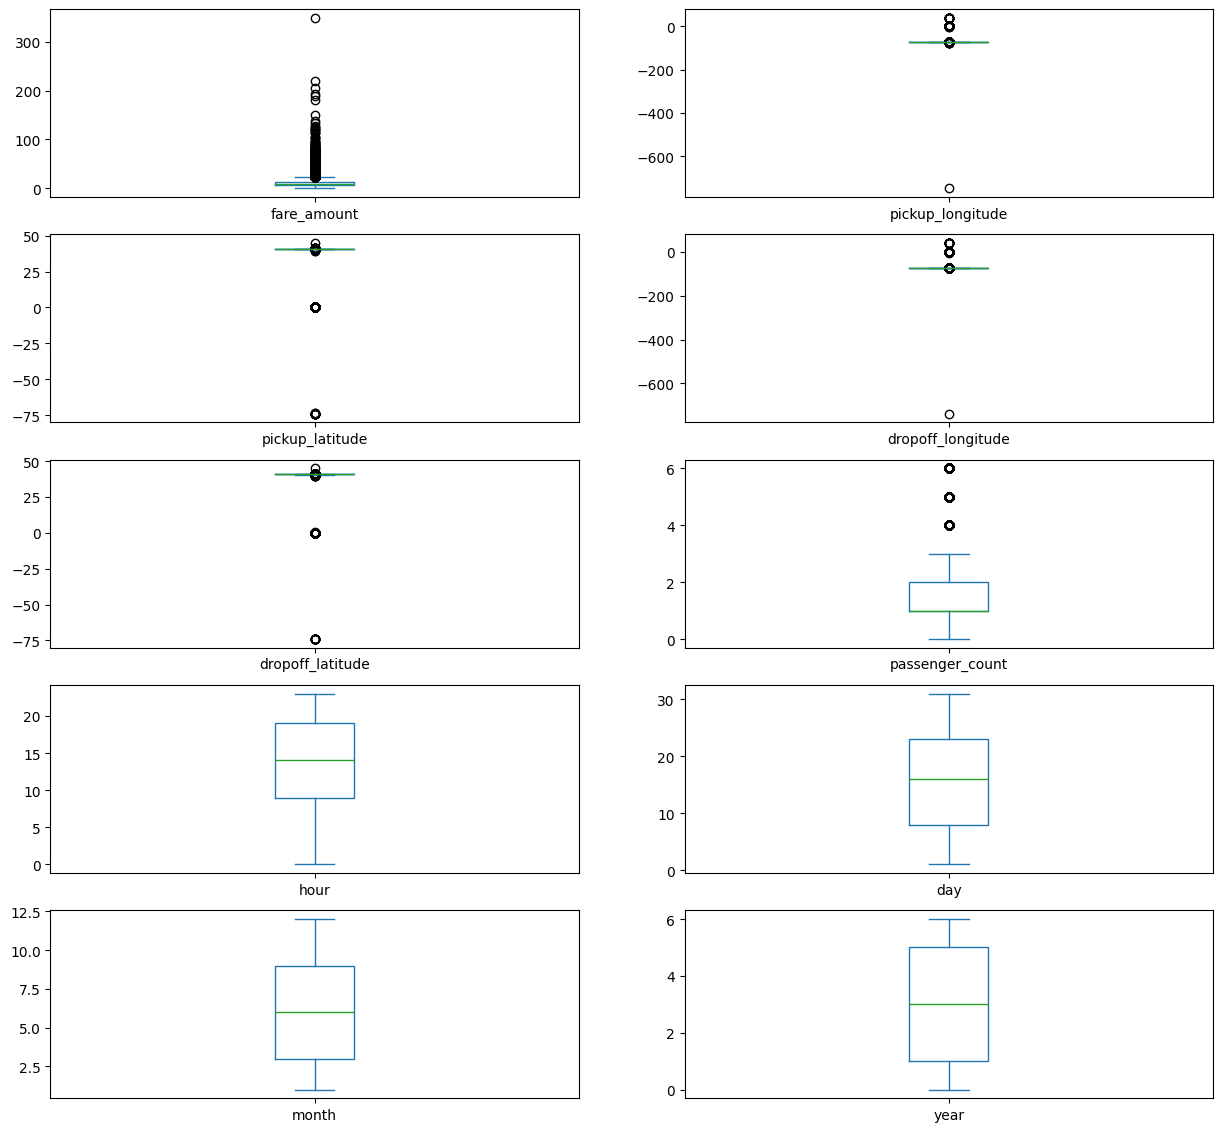

In [12]:
df.plot(kind = 'box', subplots = True, layout = (7, 2), figsize = (15, 20))
plt.show()

In [13]:
pip install haversine

In [14]:
def remove_outlier(df1 , col):
  Q1 = df1[col].quantile(0.25)
  Q3 = df1[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_whisker = Q1-1.5*IQR
  upper_whisker = Q3+1.5*IQR
  df[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
  return df1

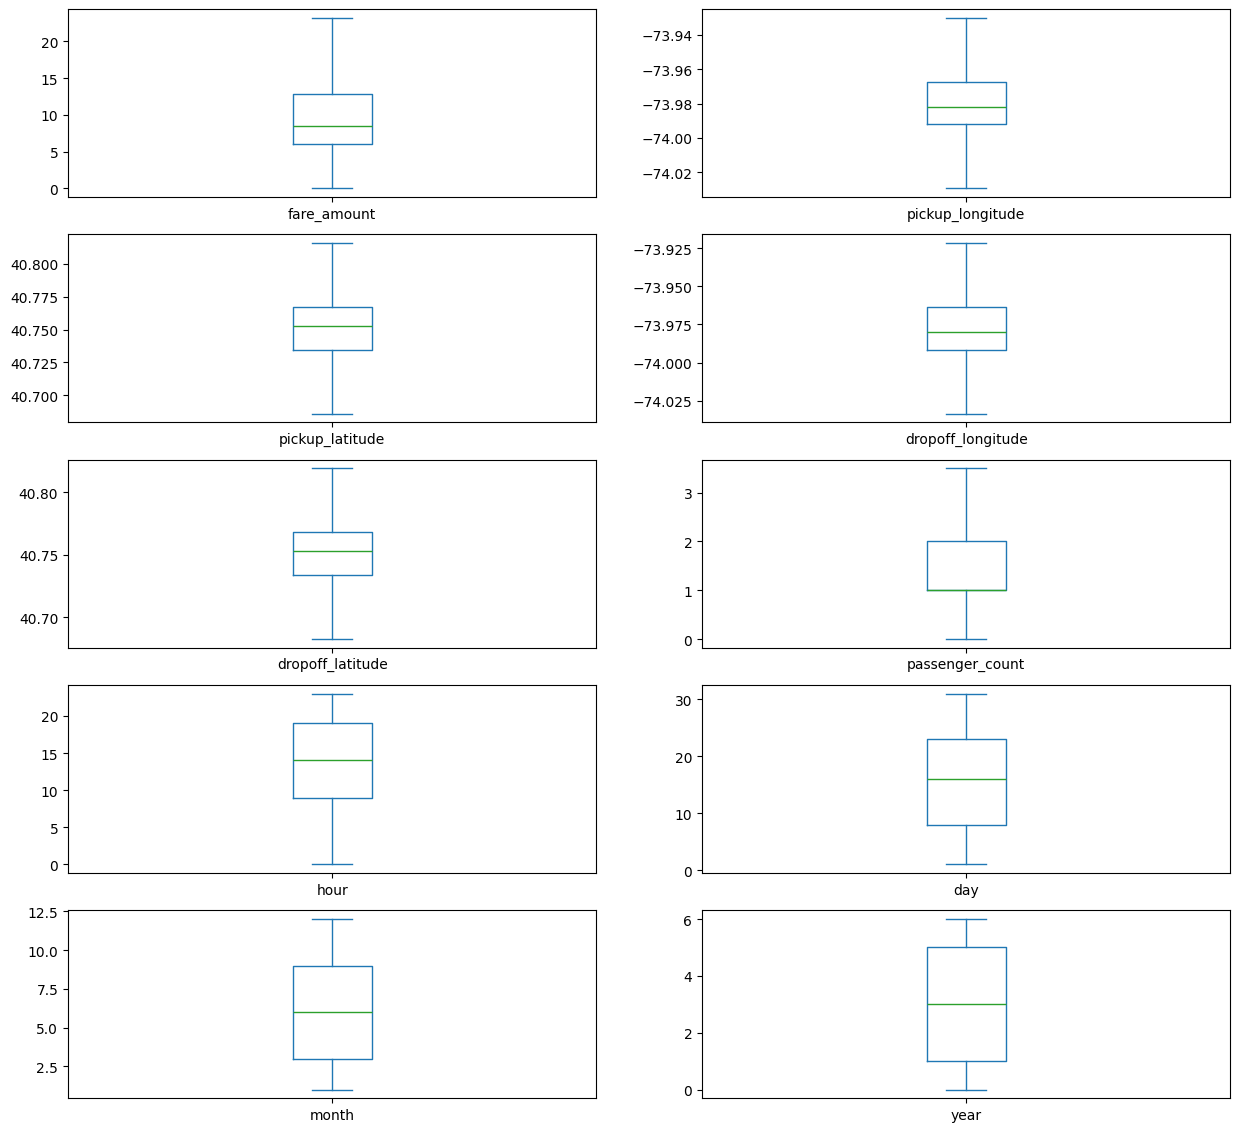

In [15]:
def treat_outliers_all(df1 , col_list):
  for c in col_list:
    df1 = remove_outlier(df , c)
  return df1
df = treat_outliers_all(df , df.iloc[:,0::])
df.plot(kind = 'box', subplots = True, layout = (7, 2), figsize = (15, 20))
plt.show()

In [16]:
import haversine as hs
travel_dist = []
for pos in range(len(df['pickup_longitude'])):
  long1,lati1,long2,lati2 = [df['pickup_longitude'][pos],df['pickup_latitude'][pos],df['dropoff_longitude'][pos],df['dropoff_latitude'][pos]]
  loc1=(lati1,long1)
  loc2=(lati2,long2)
  c = hs.haversine(loc1,loc2)
  travel_dist.append(c)
print(travel_dist)


[1.6833250775073447, 2.4575932783467835, 5.036384146783453, 1.661685753650294, 4.104580316730644, 0.0, 9.541169340927313, 0.808540695663189, 2.3327142314177545, 4.889423641655177, 2.2508607308770285, 0.808540695663189, 0.3022521108558365, 3.5812557740132496, 1.3099517093917648, 1.716279792276335, 0.7299665570466272, 2.515953547298386, 1.790321726187665, 1.0347050399795192, 2.4902472008677727, 0.9594701844599927, 1.2613897673437817, 1.7517650017211177, 6.1932445014761095, 2.736192584061414, 0.7232537124105735, 3.229443537425455, 1.4295172964395384, 2.233699311547041, 11.086591403883585, 1.8950491608266506, 1.9049353402365328, 3.1821178242889583, 4.4851624175863325, 2.9230236888626995, 1.200213842045202, 2.635790807404098, 2.253613903554444, 9.208057635106595, 4.826533532872274, 1.2502926870845612, 0.7984742276755328, 0.840396152683202, 0.38519924001701444, 2.434346176233359, 3.127909533264099, 3.7346507724526368, 0.0, 4.504360509008704, 1.5579008497303448, 4.923160610490316, 7.683158068

In [17]:
df['dist_travel_km'] = travel_dist
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,19.0,7.0,5.0,3.0,1.683325
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,20.0,17.0,7.0,4.0,2.457593
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,21.0,24.0,8.0,0.0,5.036384
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,8.0,26.0,6.0,4.0,1.661686
4,16.0,-73.929941,40.744085,-73.973082,40.761247,3.5,17.0,28.0,8.0,3.0,4.104580


In [18]:
df= df.loc[(df.dist_travel_km >= 1) | (df.dist_travel_km <= 130)]
print("Remaining observastions in the dataset:", df.shape)

Remaining observastions in the dataset: (35724, 11)


<ipython-input-19-19c8c871ee1f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(incorrect_coordinates, inplace = True, errors = 'ignore')


<Axes: >

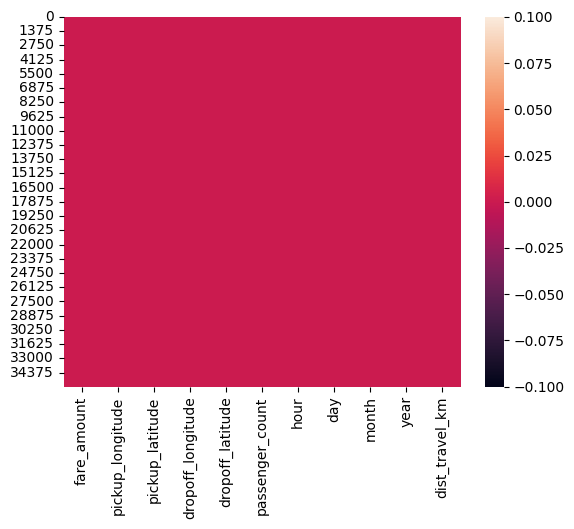

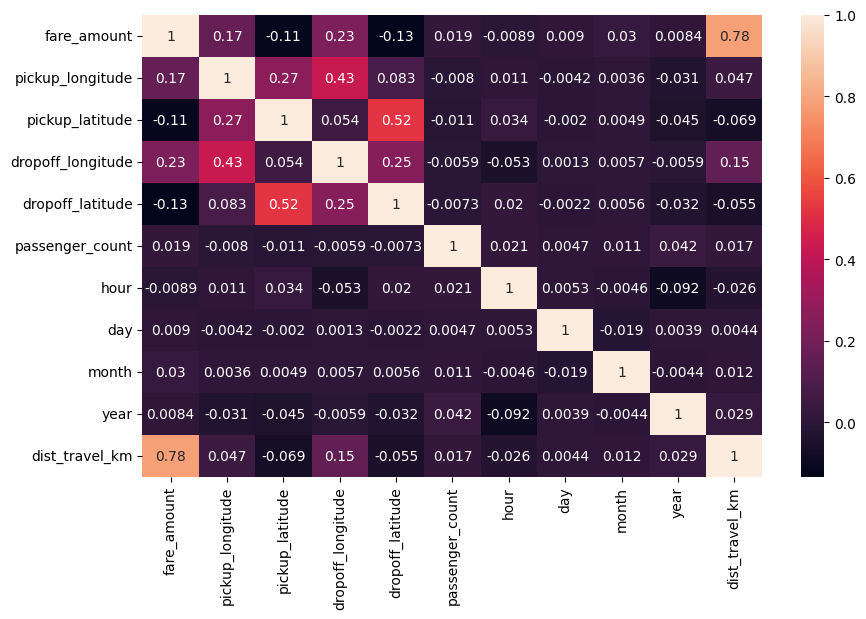

In [19]:
incorrect_coordinates = df.loc[(df.pickup_latitude > 90) |(df.pickup_latitude < -90) |
 (df.dropoff_latitude > 90) |(df.dropoff_latitude < -90) |
 (df.pickup_longitude > 180) |(df.pickup_longitude < -180) |
 (df.dropoff_longitude > 90) |(df.dropoff_longitude < -90)
 ]
df.drop(incorrect_coordinates, inplace = True, errors = 'ignore')
df.head()
df.isnull().sum()
sns.heatmap(df.isnull()) #Free for null values
corr = df.corr() #Function to find the correlation
corr
fig,axis = plt.subplots(figsize = (10,6))
sns.heatmap(df.corr(),annot = True) #Correlation Heatmap (Light values means highly correlated

In [21]:
x = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','hour','day','month','year','dayofweek','dist_travel_km']]
y = df['fare_amount']

KeyError: "['dayofweek'] not in index"

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.33)

KeyError: "['target_variable'] not found in axis"

In [24]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)
regression.coef_ #To find the linear coeeficient
regression.intercept_ #To find the linear intercept
prediction = regression.predict(X_test) #To predict the target values
print(prediction)
y_test

NameError: name 'X_train' is not defined

In [25]:
from sklearn.metrics import r2_score
r2_score(y_test,prediction)
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,prediction)
MSE
RMSE = np.sqrt(MSE)
RMSE
3.156187085348032

NameError: name 'y_test' is not defined

In [26]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100) #Here n_estimators means number of trees you
want to build before making the prediction
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
y_pred
array([ 5.714 , 10.285 , 12.68 , ..., 6.338 , 19.4685, 7.712 ])

SyntaxError: invalid syntax (<ipython-input-26-31ef9922158a>, line 3)

In [27]:
R2_Random = r2_score(y_test,y_pred)
R2_Random
MSE_Random = mean_squared_error(y_test,y_pred)
MSE_Random
RMSE_Random = np.sqrt(MSE_Random)
RMSE_Random

NameError: name 'y_test' is not defined